In [1135]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from cv2 import resize
import cv2
from skimage.feature import hog
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import glob

In [1136]:
# Part 1
def get_features(set_):
    if set_=='training':
        training_features=[]
        for img_name in glob.glob('/Users/bhalli/Desktop/machine learning/assignment 2/part 1/training_set/cats/*'):
            img=cv2.imread(img_name)
            resized_img=resize(img,(64,32))
            fd = hog(resized_img)
            reshaped_img_with_label=np.concatenate([np.array([0]),fd])
            training_features.append(reshaped_img_with_label)
        for img_name in glob.glob('/Users/bhalli/Desktop/machine learning/assignment 2/part 1/training_set/dogs/*'):
            img=cv2.imread(img_name)
            resized_img=resize(img,(64,32))
            fd = hog(resized_img)
            reshaped_img_with_label=np.concatenate([np.array([1]),fd])
            training_features.append(reshaped_img_with_label)
        return np.array(training_features)
    elif set_=='testing':
        test_features=[]
        for img_name in glob.glob('/Users/bhalli/Desktop/machine learning/assignment 2/part 1/test_set/cats/*'):
            img=cv2.imread(img_name)
            resized_img=resize(img,(64,32))
            fd = hog(resized_img)
            reshaped_img_with_label=np.concatenate([np.array([0]),fd])
            test_features.append(reshaped_img_with_label)
        for img_name in glob.glob('/Users/bhalli/Desktop/machine learning/assignment 2/part 1/test_set/dogs/*'):
            img=cv2.imread(img_name)
            resized_img=resize(img,(64,32))
            fd = hog(resized_img)
            reshaped_img_with_label=np.concatenate([np.array([1]),fd])
            test_features.append(reshaped_img_with_label)
        return np.array(test_features)

In [1137]:
final_training_set=get_features('training')
final_test_set=get_features('testing')

In [1138]:
def knn(k,metric,train_set,test_set):
    if metric=='euclidean':
        predicted_label=[]
        for i in range(0,test_set.shape[0]):
            temp=train_set[:,1:]
            temp_label=train_set[:,0]
            temp=temp-test_set[i,1:]
            temp=np.sqrt(np.sum(np.square(temp),axis=1))
            final_temp=np.concatenate([temp_label.reshape(temp_label.shape[0],1),temp.reshape(temp.shape[0],1)],axis=1)
            final_temp=final_temp[final_temp[:,1].argsort()]
            k_nearest=final_temp[0:k,0]
            unique, counts = np.unique(k_nearest, return_counts=True)
            try:
                if counts[0]>counts[1]:
                    predicted_label.append(0)
                    continue
                elif counts[1]>counts[0]:
                    predicted_label.append(1)
                    continue
            except:
                predicted_label.append(unique[0])
                continue
            unique, counts = np.unique(k_nearest[0:k-1], return_counts=True)
            try:
                if counts[0]>counts[1]:
                    predicted_label.append(0)
                    continue
                elif counts[1]>counts[0]:
                    predicted_label.append(1)
                    continue
            except:
                predicted_label.append(unique[0])
                continue
    elif metric=='manhattan':
        predicted_label=[]
        for i in range(0,test_set.shape[0]):
            temp=train_set[:,1:]
            temp_label=train_set[:,0]
            temp=temp-test_set[i,1:]
            temp=np.sum(np.abs(temp),axis=1)
            final_temp=np.concatenate([temp_label.reshape(temp_label.shape[0],1),temp.reshape(temp.shape[0],1)],axis=1)
            final_temp=final_temp[final_temp[:,1].argsort()]
            k_nearest=final_temp[0:k,0]
            unique, counts = np.unique(k_nearest, return_counts=True)
            try:
                if counts[0]>counts[1]:
                    predicted_label.append(0)
                    continue
                elif counts[1]>counts[0]:
                    predicted_label.append(1)
                    continue
            except:
                predicted_label.append(unique[0])
                continue
            unique, counts = np.unique(k_nearest[0:k-1], return_counts=True)
            try:
                if counts[0]>counts[1]:
                    predicted_label.append(0)
                    continue
                elif counts[1]>counts[0]:
                    predicted_label.append(1)
                    continue
            except:
                predicted_label.append(unique[0])
                continue
    return predicted_label

In [1139]:
def evaluation(predicted_label,true_label,beta):
    predicted_label=np.array(predicted_label)
    true_positive=0
    true_negative=0
    false_positive=0
    false_negative=0
    for i in range(0,predicted_label.shape[0]):
        if predicted_label[i]==true_label[i]:
            if predicted_label[i]==1:
                true_positive=true_positive+1
            elif predicted_label[i]==0:
                true_negative=true_negative+1
        else:
            if predicted_label[i]==1:
                false_positive=false_positive+1
            elif predicted_label[i]==0:
                false_negative=false_negative+1
    confusion_matrix=np.array([[true_negative,false_negative],[false_positive,true_positive]])
    accuracy=(true_positive+true_negative)/(true_positive+true_negative+false_positive+false_negative)
    precision=(true_positive)/(true_positive+false_positive)
    recall=(true_positive)/(true_positive+false_negative)
    F_score=((beta**2 +1)*precision*recall)/((beta**2)*precision + recall)
    return accuracy,confusion_matrix,F_score

In [1140]:
predicted_label_euclidean_1=knn(1,'euclidean',final_training_set,final_test_set)
predicted_label_euclidean_2=knn(2,'euclidean',final_training_set,final_test_set)
predicted_label_euclidean_3=knn(3,'euclidean',final_training_set,final_test_set)
predicted_label_euclidean_4=knn(4,'euclidean',final_training_set,final_test_set)
predicted_label_euclidean_5=knn(5,'euclidean',final_training_set,final_test_set)
predicted_label_euclidean_6=knn(6,'euclidean',final_training_set,final_test_set)
predicted_label_euclidean_7=knn(7,'euclidean',final_training_set,final_test_set)

In [1141]:
true_label=final_test_set[:,0]

In [1142]:
F_euclidean_1=evaluation(predicted_label_euclidean_1,true_label,1)
F_euclidean_2=evaluation(predicted_label_euclidean_2,true_label,1)
F_euclidean_3=evaluation(predicted_label_euclidean_3,true_label,1)
F_euclidean_4=evaluation(predicted_label_euclidean_4,true_label,1)
F_euclidean_5=evaluation(predicted_label_euclidean_5,true_label,1)
F_euclidean_6=evaluation(predicted_label_euclidean_6,true_label,1)
F_euclidean_7=evaluation(predicted_label_euclidean_7,true_label,1)

In [1143]:
predicted_label_manhattan_1=knn(1,'manhattan',final_training_set,final_test_set)
predicted_label_manhattan_2=knn(2,'manhattan',final_training_set,final_test_set)
predicted_label_manhattan_3=knn(3,'manhattan',final_training_set,final_test_set)
predicted_label_manhattan_4=knn(4,'manhattan',final_training_set,final_test_set)
predicted_label_manhattan_5=knn(5,'manhattan',final_training_set,final_test_set)
predicted_label_manhattan_6=knn(6,'manhattan',final_training_set,final_test_set)
predicted_label_manhattan_7=knn(7,'manhattan',final_training_set,final_test_set)

In [1144]:
F_manhattan_1=evaluation(predicted_label_manhattan_1,true_label,1)
F_manhattan_2=evaluation(predicted_label_manhattan_2,true_label,1)
F_manhattan_3=evaluation(predicted_label_manhattan_3,true_label,1)
F_manhattan_4=evaluation(predicted_label_manhattan_4,true_label,1)
F_manhattan_5=evaluation(predicted_label_manhattan_5,true_label,1)
F_manhattan_6=evaluation(predicted_label_manhattan_6,true_label,1)
F_manhattan_7=evaluation(predicted_label_manhattan_7,true_label,1)

Text(0, 0.5, 'F-score')

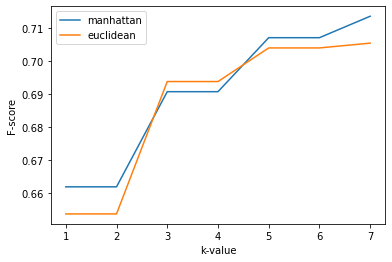

In [1145]:
plt.plot([1,2,3,4,5,6,7],[F_manhattan_1[2],F_manhattan_2[2],F_manhattan_3[2],F_manhattan_4[2],F_manhattan_5[2],F_manhattan_6[2],F_manhattan_7[2]],label='manhattan')
plt.plot([1,2,3,4,5,6,7],[F_euclidean_1[2],F_euclidean_2[2],F_euclidean_3[2],F_euclidean_4[2],F_euclidean_5[2],F_euclidean_6[2],F_euclidean_7[2]],label='euclidean')
plt.legend()
plt.xlabel('k-value')
plt.ylabel('F-score')
# The F1 score is significant beacuse it takes into account both precision and recall,and can also give different 
# weights to precision or recall. It is better than accuracy beacuse you can have a model which is extremely 
# accurate but is a terible model i.e no ball example done in class. however, for that model the f1 score will
# very low hence the f1 score gives us a better picture of the model.

In [1148]:
print(f'accuracy for manhattan k=1 {F_manhattan_1[0]}')
print(f'accuracy for manhattan k=2 {F_manhattan_2[0]}')
print(f'accuracy for manhattan k=3 {F_manhattan_3[0]}')
print(f'accuracy for manhattan k=4 {F_manhattan_4[0]}')
print(f'accuracy for manhattan k=5 {F_manhattan_5[0]}')
print(f'accuracy for manhattan k=6 {F_manhattan_6[0]}')
print(f'accuracy for manhattan k=7 {F_manhattan_7[0]}')

accuracy for manhattan k=1 0.637
accuracy for manhattan k=2 0.637
accuracy for manhattan k=3 0.6585
accuracy for manhattan k=4 0.6585
accuracy for manhattan k=5 0.6745
accuracy for manhattan k=6 0.6745
accuracy for manhattan k=7 0.681


In [1149]:
print(f'accuracy for euclidean k=1 {F_euclidean_1[0]}')
print(f'accuracy for euclidean k=2 {F_euclidean_2[0]}')
print(f'accuracy for euclidean k=3 {F_euclidean_3[0]}')
print(f'accuracy for euclidean k=4 {F_euclidean_4[0]}')
print(f'accuracy for euclidean k=5 {F_euclidean_5[0]}')
print(f'accuracy for euclidean k=6 {F_euclidean_6[0]}')
print(f'accuracy for euclidean k=7 {F_euclidean_7[0]}')

accuracy for euclidean k=1 0.605
accuracy for euclidean k=2 0.605
accuracy for euclidean k=3 0.6325
accuracy for euclidean k=4 0.6325
accuracy for euclidean k=5 0.6385
accuracy for euclidean k=6 0.6385
accuracy for euclidean k=7 0.6335


In [1150]:
# Part 2
def knn_using_library(k,metric_input):
    classifier=KNeighborsClassifier(n_neighbors=k,metric=metric_input)
    classifier.fit(final_training_set[:,1:],final_training_set[:,0])
    predicted_label=classifier.predict(final_test_set[:,1:])
    accuracy=accuracy_score(final_test_set[:,0],predicted_label)
    f1=f1_score(final_test_set[:,0],predicted_label)
    confusion=confusion_matrix(final_test_set[:,0],predicted_label)
    return accuracy,f1,confusion

In [1151]:
f_manhattan_1=knn_using_library(1,'manhattan')
f_manhattan_2=knn_using_library(2,'manhattan')
f_manhattan_3=knn_using_library(3,'manhattan')
f_manhattan_4=knn_using_library(4,'manhattan')
f_manhattan_5=knn_using_library(5,'manhattan')
f_manhattan_6=knn_using_library(6,'manhattan')
f_manhattan_7=knn_using_library(7,'manhattan')

In [1152]:
f_euclidean_1=knn_using_library(1,'euclidean')
f_euclidean_2=knn_using_library(2,'euclidean')
f_euclidean_3=knn_using_library(3,'euclidean')
f_euclidean_4=knn_using_library(4,'euclidean')
f_euclidean_5=knn_using_library(5,'euclidean')
f_euclidean_6=knn_using_library(6,'euclidean')
f_euclidean_7=knn_using_library(7,'euclidean')

Text(0, 0.5, 'F-score')

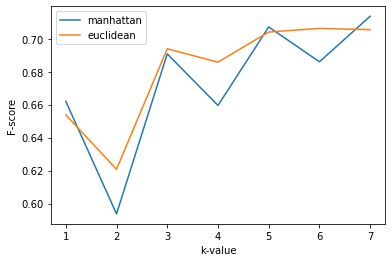

In [1153]:
plt.plot([1,2,3,4,5,6,7],[f_manhattan_1[1],f_manhattan_2[1],f_manhattan_3[1],f_manhattan_4[1],f_manhattan_5[1],f_manhattan_6[1],f_manhattan_7[1]],label='manhattan')
plt.plot([1,2,3,4,5,6,7],[f_euclidean_1[1],f_euclidean_2[1],f_euclidean_3[1],f_euclidean_4[1],f_euclidean_5[1],f_euclidean_6[1],f_euclidean_7[1]],label='euclidean')
plt.legend()
plt.xlabel('k-value')
plt.ylabel('F-score')

In [1154]:
print(f'accuracy for manhattan k=1 {f_manhattan_1[0]}')
print(f'accuracy for manhattan k=2 {f_manhattan_2[0]}')
print(f'accuracy for manhattan k=3 {f_manhattan_3[0]}')
print(f'accuracy for manhattan k=4 {f_manhattan_4[0]}')
print(f'accuracy for manhattan k=5 {f_manhattan_5[0]}')
print(f'accuracy for manhattan k=6 {f_manhattan_6[0]}')
print(f'accuracy for manhattan k=7 {f_manhattan_7[0]}')

accuracy for manhattan k=1 0.637
accuracy for manhattan k=2 0.64
accuracy for manhattan k=3 0.6585
accuracy for manhattan k=4 0.6665
accuracy for manhattan k=5 0.6745
accuracy for manhattan k=6 0.6805
accuracy for manhattan k=7 0.681


In [1155]:
print(f'accuracy for euclidean k=1 {f_euclidean_1[0]}')
print(f'accuracy for euclidean k=2 {f_euclidean_2[0]}')
print(f'accuracy for euclidean k=3 {f_euclidean_3[0]}')
print(f'accuracy for euclidean k=4 {f_euclidean_4[0]}')
print(f'accuracy for euclidean k=5 {f_euclidean_5[0]}')
print(f'accuracy for euclidean k=6 {f_euclidean_6[0]}')
print(f'accuracy for euclidean k=7 {f_euclidean_7[0]}')

accuracy for euclidean k=1 0.605
accuracy for euclidean k=2 0.631
accuracy for euclidean k=3 0.6325
accuracy for euclidean k=4 0.66
accuracy for euclidean k=5 0.6385
accuracy for euclidean k=6 0.666
accuracy for euclidean k=7 0.6335


In [1187]:
# part 3
import glob
def get_features(set_):
    if set_=='training':
        training_features=[]
        for img_name in glob.glob('/Users/bhalli/Desktop/machine learning/assignment 2/part 3/Training data/Cloudy/*'):
            img=cv2.imread(img_name, cv2.IMREAD_COLOR)
            reshaped_img=resize(img,(32,32))
            reshaped_img=reshaped_img.reshape(reshaped_img.shape[0]*reshaped_img.shape[1]*reshaped_img.shape[2])
            reshaped_img_with_label=np.concatenate([np.array([0]),reshaped_img])
            training_features.append(reshaped_img_with_label)
        for img_name in glob.glob('/Users/bhalli/Desktop/machine learning/assignment 2/part 3/Training data/Rain/*'):
            img=cv2.imread(img_name, cv2.IMREAD_COLOR)
            reshaped_img=resize(img,(32,32))
            reshaped_img=reshaped_img.reshape(reshaped_img.shape[0]*reshaped_img.shape[1]*reshaped_img.shape[2])
            reshaped_img_with_label=np.concatenate([np.array([1]),reshaped_img])
            training_features.append(reshaped_img_with_label)
        for img_name in glob.glob('/Users/bhalli/Desktop/machine learning/assignment 2/part 3/Training data/Shine/*'):
            img=cv2.imread(img_name, cv2.IMREAD_COLOR)
            reshaped_img=resize(img,(32,32))
            reshaped_img=reshaped_img.reshape(reshaped_img.shape[0]*reshaped_img.shape[1]*reshaped_img.shape[2])
            reshaped_img_with_label=np.concatenate([np.array([2]),reshaped_img])
            training_features.append(reshaped_img_with_label)
        for img_name in glob.glob('/Users/bhalli/Desktop/machine learning/assignment 2/part 3/Training data/Sunrise/*'):
            img=cv2.imread(img_name, cv2.IMREAD_COLOR)
            reshaped_img=resize(img,(32,32))
            reshaped_img=reshaped_img.reshape(reshaped_img.shape[0]*reshaped_img.shape[1]*reshaped_img.shape[2])
            reshaped_img_with_label=np.concatenate([np.array([3]),reshaped_img])
            training_features.append(reshaped_img_with_label)
        return np.array(training_features)
    elif set_=='testing':
        test_features=[]
        for img_name in glob.glob('/Users/bhalli/Desktop/machine learning/assignment 2/part 3/Test data/Cloudy/*'):
            img=cv2.imread(img_name, cv2.IMREAD_COLOR)
            reshaped_img=resize(img,(32,32))
            reshaped_img=reshaped_img.reshape(reshaped_img.shape[0]*reshaped_img.shape[1]*reshaped_img.shape[2])
            reshaped_img_with_label=np.concatenate([np.array([0]),reshaped_img])
            test_features.append(reshaped_img_with_label)
        for img_name in glob.glob('/Users/bhalli/Desktop/machine learning/assignment 2/part 3/Test data/Rain/*'):
            img=cv2.imread(img_name, cv2.IMREAD_COLOR)
            reshaped_img=resize(img,(32,32))
            reshaped_img=reshaped_img.reshape(reshaped_img.shape[0]*reshaped_img.shape[1]*reshaped_img.shape[2])
            reshaped_img_with_label=np.concatenate([np.array([1]),reshaped_img])
            test_features.append(reshaped_img_with_label)
        for img_name in glob.glob('/Users/bhalli/Desktop/machine learning/assignment 2/part 3/Test data/Shine/*'):
            img=cv2.imread(img_name, cv2.IMREAD_COLOR)
            reshaped_img=resize(img,(32,32))
            reshaped_img=reshaped_img.reshape(reshaped_img.shape[0]*reshaped_img.shape[1]*reshaped_img.shape[2])
            reshaped_img_with_label=np.concatenate([np.array([2]),reshaped_img])
            test_features.append(reshaped_img_with_label)
        for img_name in glob.glob('/Users/bhalli/Desktop/machine learning/assignment 2/part 3/Test data/Sunrise/*'):
            img=cv2.imread(img_name, cv2.IMREAD_COLOR)
            reshaped_img=resize(img,(32,32))
            reshaped_img=reshaped_img.reshape(reshaped_img.shape[0]*reshaped_img.shape[1]*reshaped_img.shape[2])
            reshaped_img_with_label=np.concatenate([np.array([3]),reshaped_img])
            test_features.append(reshaped_img_with_label)
        return np.array(test_features)

In [1188]:
training_features=get_features('training')
test_features=get_features('testing')

In [1189]:
def knn_multi(k,metric,train_set,test_set):
    if metric=='euclidean':
        predicted_label=[]
        for i in range(0,test_set.shape[0]):
            temp=train_set[:,1:]
            temp_label=train_set[:,0]
            temp=temp-test_set[i,1:]
            temp=np.sqrt(np.sum(np.square(temp),axis=1))
            final_temp=np.concatenate([temp_label.reshape(temp_label.shape[0],1),temp.reshape(temp.shape[0],1)],axis=1)
            final_temp=final_temp[final_temp[:,1].argsort()]
            k_nearest=final_temp[0:k,0]
            unique, counts = np.unique(k_nearest, return_counts=True)
            dic=dict(zip(unique,counts))
            max_label=[k for k,v in dic.items() if v == max(dic.values())]
            if len(max_label)==1:
                predicted_label.append(max_label[0])
            elif len(max_label)>1:
                for k_new in range(k-1,0,-1):
                    k_nearest=final_temp[0:k_new,0]
                    unique, counts = np.unique(k_nearest, return_counts=True)
                    dic=dict(zip(unique,counts))
                    max_label=[k for k,v in dic.items() if v == max(dic.values())]
                    if len(max_label)==1:
                        predicted_label.append(max_label[0])
                        break
                    else:
                        continue
    elif metric=='manhattan':
        predicted_label=[]
        for i in range(0,test_set.shape[0]):
            temp=train_set[:,1:]
            temp_label=train_set[:,0]
            temp=temp-test_set[i,1:]
            temp=np.sum(np.abs(temp),axis=1)
            final_temp=np.concatenate([temp_label.reshape(temp_label.shape[0],1),temp.reshape(temp.shape[0],1)],axis=1)
            final_temp=final_temp[final_temp[:,1].argsort()]
            k_nearest=final_temp[0:k,0]
            unique, counts = np.unique(k_nearest, return_counts=True)
            dic=dict(zip(unique,counts))
            max_label=[k for k,v in dic.items() if v == max(dic.values())]
            if len(max_label)==1:
                predicted_label.append(max_label[0])
            elif len(max_label)>1:
                for k_new in range(k-1,0,-1):
                    k_nearest=final_temp[0:k_new,0]
                    unique, counts = np.unique(k_nearest, return_counts=True)
                    dic=dict(zip(unique,counts))
                    max_label=[k for k,v in dic.items() if v == max(dic.values())]
                    if len(max_label)==1:
                        predicted_label.append(max_label[0])
                        break
                    else:
                        continue
    return np.array(predicted_label)

In [1190]:
predict_euclidean_1=knn_multi(1,'euclidean',training_features,test_features)
predict_euclidean_2=knn_multi(2,'euclidean',training_features,test_features)
predict_euclidean_3=knn_multi(3,'euclidean',training_features,test_features)
predict_euclidean_4=knn_multi(4,'euclidean',training_features,test_features)
predict_euclidean_5=knn_multi(5,'euclidean',training_features,test_features)
predict_euclidean_6=knn_multi(6,'euclidean',training_features,test_features)
predict_euclidean_7=knn_multi(7,'euclidean',training_features,test_features)

In [1191]:
predict_manhattan_1=knn_multi(1,'manhattan',training_features,test_features)
predict_manhattan_2=knn_multi(2,'manhattan',training_features,test_features)
predict_manhattan_3=knn_multi(3,'manhattan',training_features,test_features)
predict_manhattan_4=knn_multi(4,'manhattan',training_features,test_features)
predict_manhattan_5=knn_multi(5,'manhattan',training_features,test_features)
predict_manhattan_6=knn_multi(6,'manhattan',training_features,test_features)
predict_manhattan_7=knn_multi(7,'manhattan',training_features,test_features)

In [1192]:
def evaluation_multi(true,predict,beta):
    unique_labels=np.unique(true)
    confusion_matrix=np.zeros((len(unique_labels),len(unique_labels)))
    for label in unique_labels:
        for i in range(true.shape[0]):
            if true[i]==predict[i] and predict[i]==label:
                confusion_matrix[int(label),int(label)]=confusion_matrix[int(label),int(label)]+1
            elif true[i]!=predict[i] and predict[i]==label:
                confusion_matrix[int(predict[i]),int(true[i])]=confusion_matrix[int(predict[i]),int(true[i])]+1
    correct_predicted=0
    sum_class_recall=0
    sum_class_precision=0
    for i in range(len(unique_labels)):
        correct_predicted=correct_predicted+float(confusion_matrix[i,i])
        sum_class_recall=sum_class_recall+(float(confusion_matrix[i,i]))/(confusion_matrix[:,i].sum())
        sum_class_precision=sum_class_precision+(float(confusion_matrix[i,i]))/(confusion_matrix[i,:].sum())
    accuracy=correct_predicted/(true.shape[0])
    recall=sum_class_recall/(len(unique_labels))
    precision=sum_class_precision/(len(unique_labels))
    f_score=((beta**2 +1)*precision*recall)/((beta**2)*precision + recall)
    return confusion_matrix,accuracy,f_score

In [1193]:
manhattan_1_f1=evaluation_multi(test_features[:,0],predict_manhattan_1,1)
manhattan_2_f1=evaluation_multi(test_features[:,0],predict_manhattan_2,1)
manhattan_3_f1=evaluation_multi(test_features[:,0],predict_manhattan_3,1)
manhattan_4_f1=evaluation_multi(test_features[:,0],predict_manhattan_4,1)
manhattan_5_f1=evaluation_multi(test_features[:,0],predict_manhattan_5,1)
manhattan_6_f1=evaluation_multi(test_features[:,0],predict_manhattan_6,1)
manhattan_7_f1=evaluation_multi(test_features[:,0],predict_manhattan_7,1)

In [1194]:
euclidean_1_f1=evaluation_multi(test_features[:,0],predict_euclidean_1,1)
euclidean_2_f1=evaluation_multi(test_features[:,0],predict_euclidean_2,1)
euclidean_3_f1=evaluation_multi(test_features[:,0],predict_euclidean_3,1)
euclidean_4_f1=evaluation_multi(test_features[:,0],predict_euclidean_4,1)
euclidean_5_f1=evaluation_multi(test_features[:,0],predict_euclidean_5,1)
euclidean_6_f1=evaluation_multi(test_features[:,0],predict_euclidean_6,1)
euclidean_7_f1=evaluation_multi(test_features[:,0],predict_euclidean_7,1)

Text(0, 0.5, 'F-score')

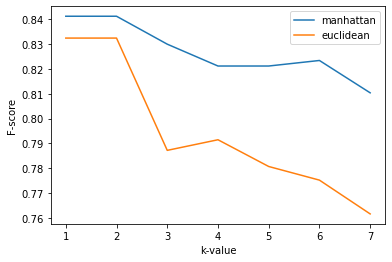

In [1195]:
plt.plot([1,2,3,4,5,6,7],[manhattan_1_f1[2],manhattan_2_f1[2],manhattan_3_f1[2],manhattan_4_f1[2],manhattan_4_f1[2],manhattan_6_f1[2],manhattan_7_f1[2]],label='manhattan')
plt.plot([1,2,3,4,5,6,7],[euclidean_1_f1[2],euclidean_2_f1[2],euclidean_3_f1[2],euclidean_4_f1[2],euclidean_5_f1[2],euclidean_6_f1[2],euclidean_7_f1[2]],label='euclidean')
plt.legend()
plt.xlabel('k-value')
plt.ylabel('F-score')

In [1196]:
print(f'accuracy for manhattan k=1 {manhattan_1_f1[1]}')
print(f'accuracy for manhattan k=2 {manhattan_2_f1[1]}')
print(f'accuracy for manhattan k=3 {manhattan_3_f1[1]}')
print(f'accuracy for manhattan k=4 {manhattan_4_f1[1]}')
print(f'accuracy for manhattan k=5 {manhattan_5_f1[1]}')
print(f'accuracy for manhattan k=6 {manhattan_6_f1[1]}')
print(f'accuracy for manhattan k=7 {manhattan_7_f1[1]}')

accuracy for manhattan k=1 0.84375
accuracy for manhattan k=2 0.84375
accuracy for manhattan k=3 0.8258928571428571
accuracy for manhattan k=4 0.8169642857142857
accuracy for manhattan k=5 0.8169642857142857
accuracy for manhattan k=6 0.8214285714285714
accuracy for manhattan k=7 0.8080357142857143


In [1197]:
print(f'accuracy for euclidean k=1 {euclidean_1_f1[1]}')
print(f'accuracy for euclidean k=2 {euclidean_2_f1[1]}')
print(f'accuracy for euclidean k=3 {euclidean_3_f1[1]}')
print(f'accuracy for euclidean k=4 {euclidean_4_f1[1]}')
print(f'accuracy for euclidean k=5 {euclidean_5_f1[1]}')
print(f'accuracy for euclidean k=6 {euclidean_6_f1[1]}')
print(f'accuracy for euclidean k=7 {euclidean_7_f1[1]}')

accuracy for euclidean k=1 0.8303571428571429
accuracy for euclidean k=2 0.8303571428571429
accuracy for euclidean k=3 0.7767857142857143
accuracy for euclidean k=4 0.78125
accuracy for euclidean k=5 0.7723214285714286
accuracy for euclidean k=6 0.7678571428571429
accuracy for euclidean k=7 0.7544642857142857
